In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [ ]:
cars = pd.read_csv('/content/car.csv')
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
cars.shape

(11914, 16)

In [ ]:
cars.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

We will drop the Market Category, year & Make as these are the columns which are not prominent ones.

In [ ]:
cars.drop(['Market Category'], axis =1,inplace= True)
cars.drop(['Model'], axis =1,inplace= True)



In [ ]:
cars.head()

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [ ]:
# Handling Missing Values of int and object

cars['Engine HP'] = cars['Engine HP'].fillna(cars['Engine HP'].mean())
cars['Number of Doors'] = cars['Number of Doors'].fillna(cars['Number of Doors'].mean())
cars['Engine Cylinders'] = cars['Engine Cylinders'].fillna(cars['Engine Cylinders'].mean())
cars['Engine Fuel Type'] = cars['Engine Fuel Type'].fillna(cars['Engine Fuel Type'].mode()[0])




In [ ]:
cars.shape

(11914, 14)

In [ ]:
cars.isnull().sum()

Make                 0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [ ]:
cars

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


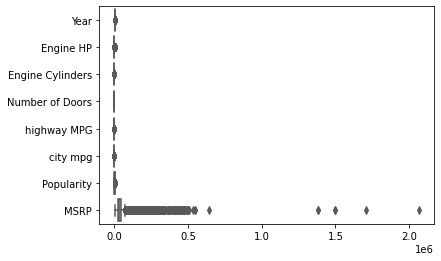

In [ ]:
sns.boxplot(data=cars,orient='h',palette='Set2')

Removing unncessary data points.

In [ ]:
cars.drop(cars[cars['MSRP'] >= 500000].index,inplace=True)

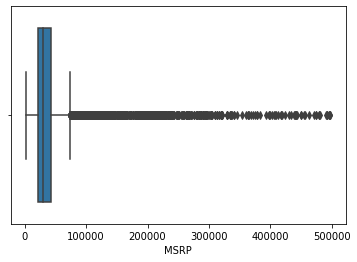

In [ ]:
sns.boxplot(x=cars['MSRP'])

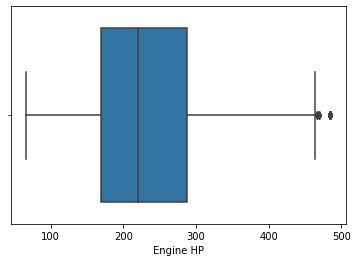

In [ ]:
sns.boxplot(x=cars['Engine HP'])

Heatmap will helps us to visualize the high n less correlated features

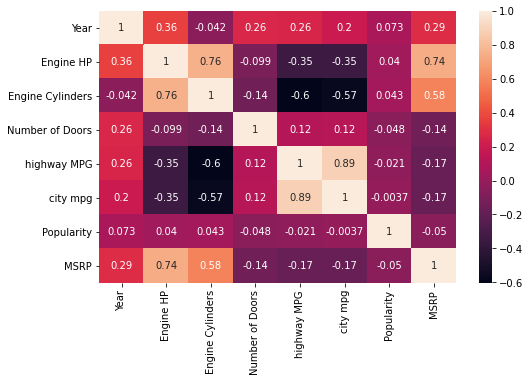

In [ ]:
plt.figure(figsize= (8,5))
correlation = cars.corr().round(4)
sns.heatmap(data= correlation, annot = True)
plt.show()

Inter qualtile range will help us to know the mid range value of the features

In [ ]:
Q1 = cars.quantile(0.25)
Q3 = cars.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                    9.0
Engine HP             130.0
Engine Cylinders        2.0
Number of Doors         2.0
highway MPG             8.0
city mpg                6.0
Popularity           1460.0
MSRP                21167.5
dtype: float64


In [ ]:
cars = cars[~((cars < (Q1 - 1.5*IQR))|(cars > (Q3 + 1.5*IQR))).any(axis = 1)]
cars.shape

(9083, 14)

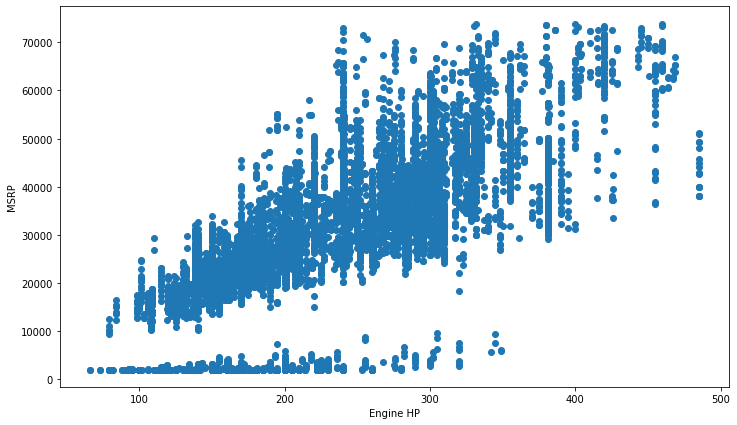

In [ ]:
fig,ax = plt.subplots(figsize=(12,7))
ax.scatter(cars['Engine HP'],cars['MSRP'])
ax.set_xlabel('Engine HP')
ax.set_ylabel('MSRP')
plt.show()

In [ ]:
check_norm=cars[['MSRP','Engine HP']]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


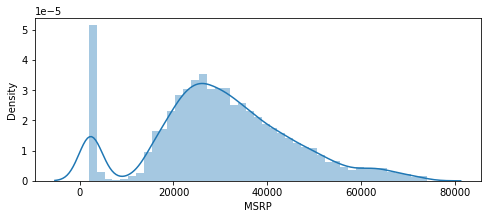

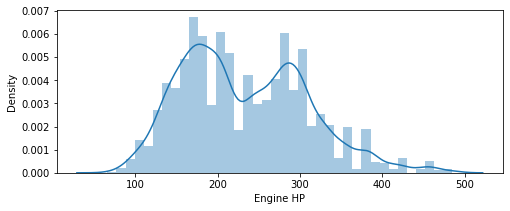

In [ ]:
for x in check_norm:
    plt.figure(figsize=(8,3))
    sns.distplot(check_norm[x])

In [ ]:
cars

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9083 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               9083 non-null   object 
 1   Year               9083 non-null   int64  
 2   Engine Fuel Type   9083 non-null   object 
 3   Engine HP          9083 non-null   float64
 4   Engine Cylinders   9083 non-null   float64
 5   Transmission Type  9083 non-null   object 
 6   Driven_Wheels      9083 non-null   object 
 7   Number of Doors    9083 non-null   float64
 8   Vehicle Size       9083 non-null   object 
 9   Vehicle Style      9083 non-null   object 
 10  highway MPG        9083 non-null   int64  
 11  city mpg           9083 non-null   int64  
 12  Popularity         9083 non-null   int64  
 13  MSRP               9083 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 1.0+ MB


Convert the impacting categorical feature in numerical

In [ ]:
columns_to_convert=['Make']
cars[columns_to_convert] = cars[columns_to_convert].astype('category')

label_encoder object knows how to understand word labels.
Encode labels in column 'species'.

In [ ]:
from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()
  
for col in ['Make']: cars[col] = label_encoder.fit_transform(cars[col])

From the heatmap, we choose the features which are highly corelated with MSRP

In [ ]:
x=cars[['Make','Engine HP','Engine Cylinders','Year']]
y=cars['MSRP']

In [ ]:
x.head(10)

,Make,Engine HP,Engine Cylinders,Year
0,3,335.0,6.0,2011
1,3,300.0,6.0,2011
2,3,300.0,6.0,2011
3,3,230.0,6.0,2011
4,3,230.0,6.0,2011
5,3,230.0,6.0,2012
6,3,300.0,6.0,2012
7,3,300.0,6.0,2012
8,3,230.0,6.0,2012
9,3,230.0,6.0,2013


Normalizing the data with standard scaler

In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)

In [ ]:
y.head()

0    46135
1    40650
2    36350
3    29450
4    34500
Name: MSRP, dtype: int64

Split the data set into train & test where training data is 75% and test data is 25%

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

Initialising the linear regression model

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Start training the model & testing the model

In [ ]:
ytrain_predict=model.predict(X_train)
ytrain_predict

array([19252.53100241, 42287.70999677, 46589.355688  , ...,
       29889.01908943, 34993.72678985, 30025.98817545])

In [ ]:
print("The R square is equal to {}".format(r2_score(y_train,ytrain_predict)))

The R square is equal to 0.7006470514201195


In [ ]:
ytest_predict=model.predict(X_test)
ytest_predict

array([49916.92668868, 40483.48570126, 20782.86253241, ...,
       40934.98979865, 27075.11052363, 37355.08133859])

In [ ]:
print("The R square is equal to {}".format(r2_score(y_test,ytest_predict)))

The R square is equal to 0.6929093400359091


Scatter plot will show us to visualize the actaul & predicted value

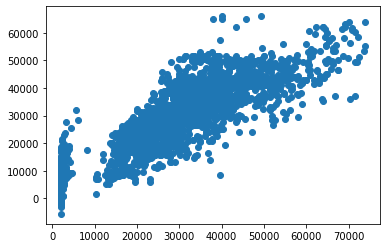

In [ ]:
plt.scatter(y_test,ytest_predict)

Printing the accuracy of the model

In [ ]:
accuracy = model.score(X_test,y_test)
print(accuracy*100,'%')

69.2909340035909 %


In [ ]:
import pickle
filename="re_x_values.pkl"
pickle.dump(x,open(filename,"wb"))

In [ ]:
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
model.predict([[3,335.0,6.0,2011]])

array([44109.42115915])

Testing the model on other values 

In [ ]:
model.predict([[3,230.0,4.0,2011]])

array([32249.0687836])

In [ ]:
model.predict([[3,300.0,4.0,2012]])

array([42361.94781592])